### Student Information
Name: 曹心瞳

Student ID: 109020022

GitHub ID: TSAOTUNG

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

---

## FIRST

In [246]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing

import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

Exercise 2

In [247]:
# category is 1
X.query('category == 1')

# category is 0 or 2
X.query('category == [0,2]')

# the first 10
X.query('index < 10')

# category name is sci.med
X.query('category_name == "sci.med"')

# mask the category is bigger than 2(all row show as NaN)
X.mask(X.iloc[:, 1] >= 2)

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1.0,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1.0,comp.graphics
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2252,NaN,NaN,NaN
2253,NaN,NaN,NaN
2254,NaN,NaN,NaN
2255,NaN,NaN,NaN


Exercise 5


In [248]:
# 在 Python 中
# 使用單引號（'）包起來的資料都是 string
# 所以加上(' '), 不管中間有內容或者是None/NaN, 都表示是一個非空的string, 因此並非缺失值

Exercise 6

In [249]:
X_sample = X.sample(n=1000,random_state=42)
# X_sample 是 X 的子集，改變的部分有：
# (1) 數量: len(X_sample) = 1000 ; len(X) = 2257
# (2) 順序: X_sample 中的順序可能與 X 中原始的順序不同，這是隨機抽樣的過程所造成

Exercise 8

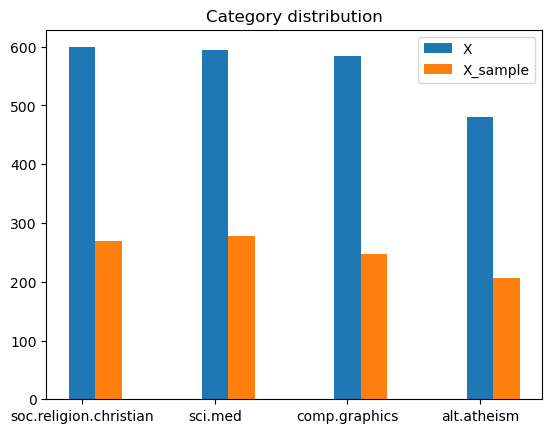

In [250]:
x = np.arange(4)

bar_width = 0.2 # 設定每個 bar 的寬度
plt.bar(x, X.category_name.value_counts(), width=bar_width, label='X')
plt.bar(x+ bar_width, X_sample.category_name.value_counts()[X.category_name.value_counts().index], width=bar_width, label='X_sample')

plt.xticks(x, X.category_name.value_counts().index, rotation=0) # 設定 x 軸
plt.title('Category distribution')
plt.legend()
plt.show()

Exercise 10

In [251]:
count_vect_exercise = CountVectorizer()
X_counts = count_vect_exercise.fit_transform(X.text)

array = X_counts[0:5, 0:100].toarray()
corresponding_word = count_vect_exercise.get_feature_names_out()[array[4].nonzero()[0][1]]
print(corresponding_word)

01


Exercise 11

,term_14269,term_30428,term_18391,term_9112,term_319,term_6710,term_33158,term_35221,term_14978,term_9639,...,term_24786,term_23652,term_7720,term_28492,term_10734,term_13073,term_30951,term_7496,term_14314,term_27340
doc_1127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2099,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_1775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_654,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


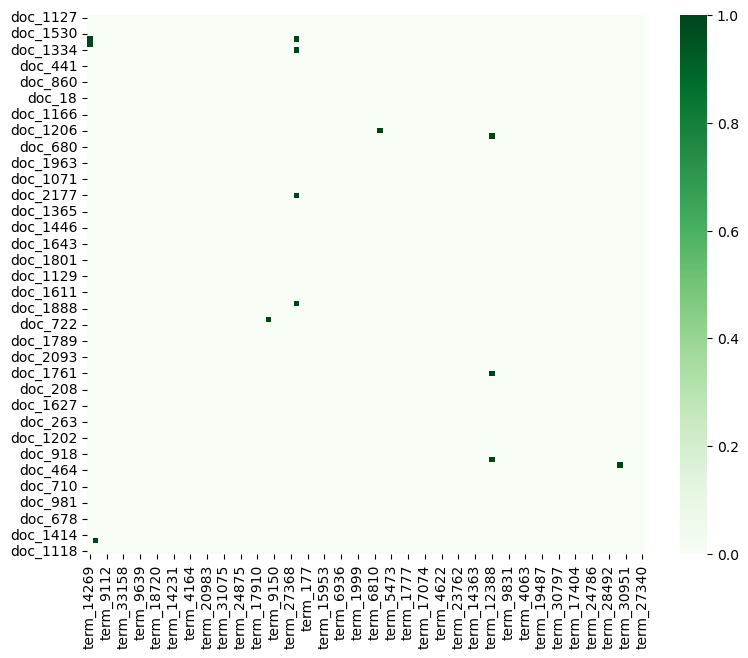

In [252]:
# 增加選取數量（100）
select_num = 100

# 改為隨機選取, 不允許重複選取
random_term = np.random.choice(len(count_vect_exercise.get_feature_names_out()), select_num, replace=False)
random_doc = np.random.choice(len(X.index), select_num, replace=False)

plot_x = ["term_" + str(i) for i in random_term]
plot_y = ["doc_" + str(i) for i in random_doc]
plot_z = X_counts[0:select_num, 0:select_num].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="Greens", vmin=0, annot=False)

Exercise 12

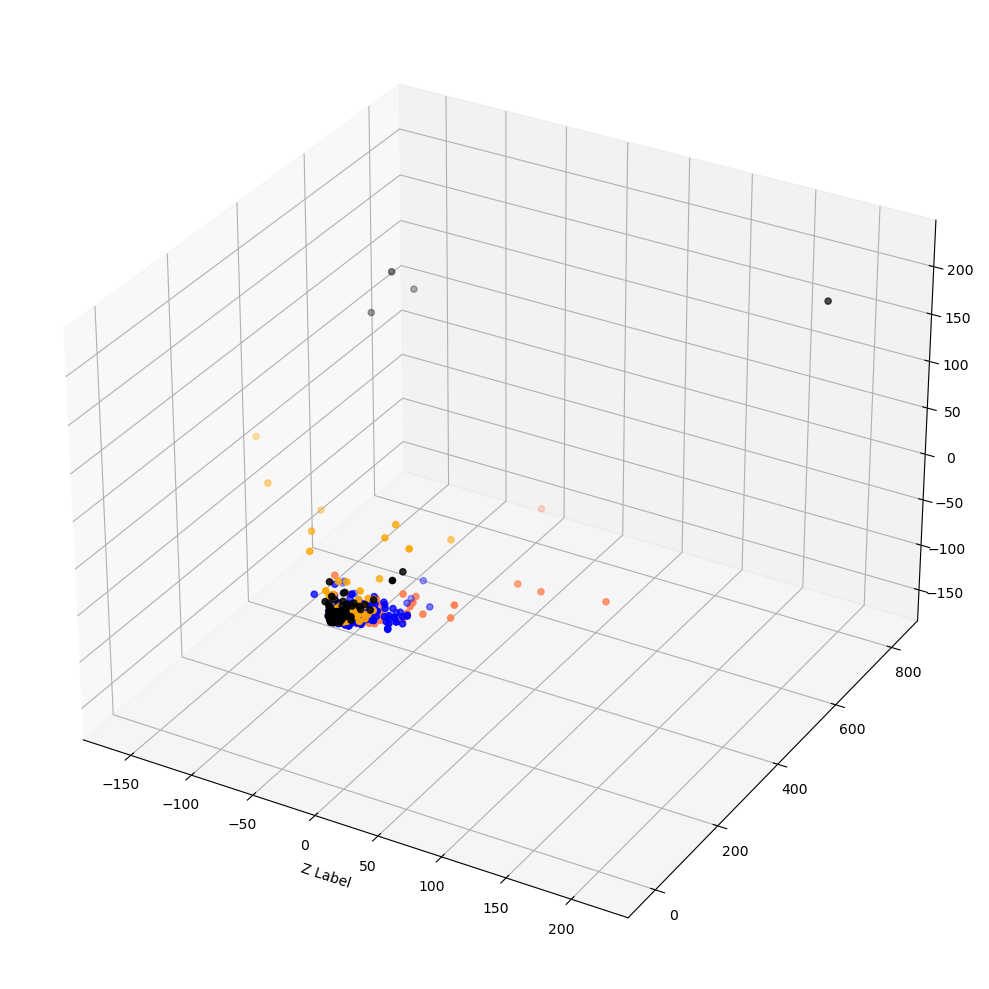

In [253]:
# 3-D
col = ['coral', 'blue', 'black', 'orange']

X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(111, projection='3d')  # Angle 1
ax2 = fig.add_subplot(111, projection='3d')  # Angle 2
ax3 = fig.add_subplot(111, projection='3d')  # Angle 3

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax1.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax2.scatter(ys, zs, xs, c=c, marker='o', label=category)
    ax3.scatter(zs, xs, ys, c=c, marker='o', label=category)


ax1.set_xlabel('X Label')
#ax1.set_ylabel('Y Label')
#ax1.set_zlabel('Z Label')
ax2.set_xlabel('Y Label')
#ax2.set_ylabel('Z Label')
#ax2.set_zlabel('X Label')
ax3.set_xlabel('Z Label')
#ax3.set_ylabel('X Label')
#ax3.set_zlabel('Y Label')
plt.tight_layout()
plt.show()

Exercise 13

In [188]:
term_frequencies_exercise = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies_exercise.append(sum(X_counts[:,j].toarray()))
term_frequencies_exercise = np.asarray(X_counts.sum(axis=0))[0]

fig = plotly.graph_objects.Figure(data=[plotly.graph_objects.Bar(x=count_vect_exercise.get_feature_names_out()[:300], y=term_frequencies_exercise[:300])])
fig.update_layout(xaxis=dict(tickangle=90), xaxis_title='Words', yaxis_title='Frequencies', title='Word Frequencies')
fig.show()

35788


Exercise 14

In [189]:
frequency_threshold = 20
# 前 300 個單字中大於 frequency_threshold
selected_word = [i for i, freq in enumerate(term_frequencies_exercise[:300]) if freq > frequency_threshold]

In [190]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

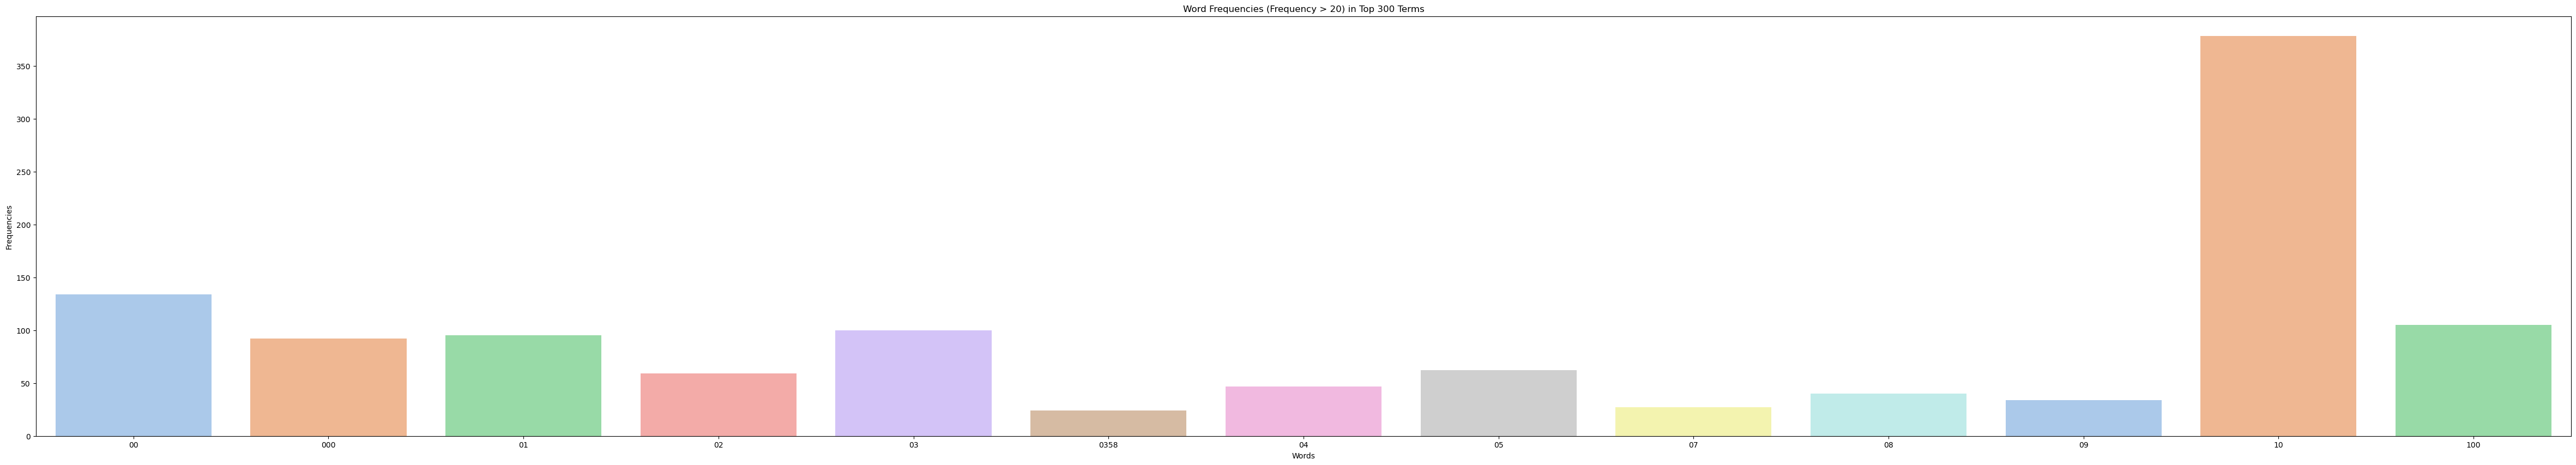

In [191]:
# by sns
plt.subplots(figsize=(60, 10))
sns.barplot(x=count_vect_exercise.get_feature_names_out()[:300][selected_word], y=term_frequencies_exercise[:300][selected_word], hue=count_vect_exercise.get_feature_names_out()[:300][selected_word], palette=sns.color_palette("pastel"), legend=False)
plt.xticks(rotation=0)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Frequencies (Frequency > {}) in Top 300 Terms'.format(frequency_threshold))
plt.show()

In [192]:
# by plotly
fig = plotly.graph_objects.Figure(data=[plotly.graph_objects.Bar(x=count_vect_exercise.get_feature_names_out()[:300][selected_word], y=term_frequencies_exercise[:300][selected_word])])
fig.update_layout(xaxis=dict(tickangle=0,tickfont=dict(size=10), title='Words'), yaxis_title='Frequencies', title='Word Frequencies (Frequency > {}) in Top 300 Terms'.format(frequency_threshold))
fig.show()

Exercise 15

In [193]:
# 由頻率排序（多到少）
sorted_freq_exercise = np.argsort(term_frequencies_exercise)[::-1]
# 選取前 50 個
top_num = 50

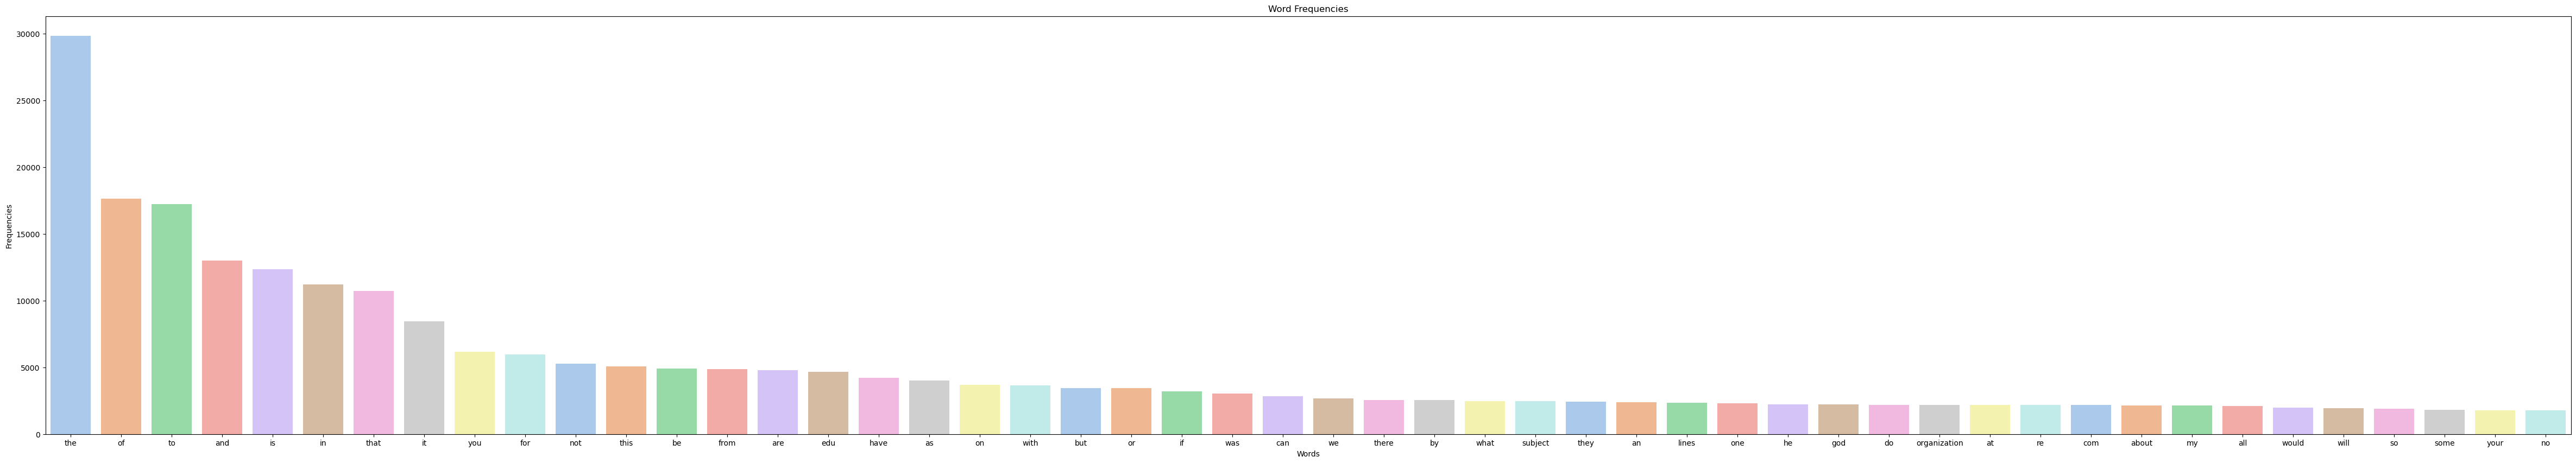

In [194]:
# by sns
plt.subplots(figsize=(60, 10))
sns.barplot(x=count_vect_exercise.get_feature_names_out()[sorted_freq_exercise[0:top_num]], y=term_frequencies_exercise[sorted_freq_exercise[0:top_num]], hue=count_vect_exercise.get_feature_names_out()[sorted_freq_exercise[0:top_num]], palette=sns.color_palette("pastel"), legend=False)
plt.xticks(rotation=0)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Frequencies')
plt.show()

In [195]:
# by plotly
fig = plotly.graph_objects.Figure(data=[plotly.graph_objects.Bar(x=count_vect_exercise.get_feature_names_out()[sorted_freq_exercise[0:top_num]], y=term_frequencies_exercise[sorted_freq_exercise[0:top_num]])])
fig.update_layout(xaxis=dict(tickangle=90), xaxis_title='Words', yaxis_title='Frequencies', title='Word Frequencies')
fig.show()

Exercise 16

In [196]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


---

## SECOND

*1. The Data*

This dataset contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants[1]. This dataset included:


1.   Sentences: Come from three different websites/fields, which are imdb,
amazon and yelp. For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
2.   Score: For each sentences, the score is either 1 (for positive) or 0 (for negative).

[1] Kotzias,Dimitrios. (2015). Sentiment Labelled Sentences. UCI Machine Learning Repository. https://doi.org/10.24432/C57604.

*2. Data Preparation & Transformation*


Combine three labeled datasets into one and convert into Pandas Dataframe.

In [197]:
import pandas as pd
import re


data = []
with open('data/amazon_cells_labelled.txt', 'r') as file:
    for line in file:
        line = line.strip()

        matches = re.match(r'(.+)(\d)$', line)
        if matches:
            sentence = matches.group(1).strip()
            score = int(matches.group(2))
            label = 'amazon'
            data.append((sentence, score, label))


with open('data/imdb_labelled.txt', 'r') as file:
    for line in file:
        line = line.strip()

        matches = re.match(r'(.+)(\d)$', line)
        if matches:
            sentence = matches.group(1).strip()
            score = int(matches.group(2))
            label = 'imdb'
            data.append((sentence, score, label))


with open('data/yelp_labelled.txt', 'r') as file:
    for line in file:
        line = line.strip()

        matches = re.match(r'(.+)(\d)$', line)
        if matches:
            sentence = matches.group(1).strip()
            score = int(matches.group(2))
            label = 'yelp'
            data.append((sentence, score, label))


df = pd.DataFrame(data, columns=['Sentence', 'Score', 'Label'])

Print out the dataframe:

In [198]:
print(df)

                                               Sentence  Score   Label
0     So there is no way for me to plug it in here i...      0  amazon
1                           Good case, Excellent value.      1  amazon
2                                Great for the jawbone.      1  amazon
3     Tied to charger for conversations lasting more...      0  amazon
4                                     The mic is great.      1  amazon
...                                                 ...    ...     ...
2995  I think food should have flavor and texture an...      0    yelp
2996                           Appetite instantly gone.      0    yelp
2997  Overall I was not impressed and would not go b...      0    yelp
2998  The whole experience was underwhelming, and I ...      0    yelp
2999  Then, as if I hadn't wasted enough of my life ...      0    yelp

[3000 rows x 3 columns]


Getting familiar to the data.

In [199]:
# the length of the data
print('length of the data:', len(df))

# the first two records of the data
print('----------------the first two records of the data----------------')
print(df.loc[:1])

# the last three records of the data
print('----------------the last three records of the data----------------')
print(df.iloc[-3:])

print('-------------------------------------------------------------------')

# different label
print('different label: ', df.Label.unique())

# different score
print('different score: ', df.Score.unique())

# query the data with positive score
print('---------------------data with positive score--------------------- ')
print(df.query('Score == 1'))

# query the data with yelp label
print('---------------------data with yelp label--------------------- ')
print(df.query('Label == "yelp"'))

length of the data: 3000
----------------the first two records of the data----------------
                                            Sentence  Score   Label
0  So there is no way for me to plug it in here i...      0  amazon
1                        Good case, Excellent value.      1  amazon
----------------the last three records of the data----------------
                                               Sentence  Score Label
2997  Overall I was not impressed and would not go b...      0  yelp
2998  The whole experience was underwhelming, and I ...      0  yelp
2999  Then, as if I hadn't wasted enough of my life ...      0  yelp
-------------------------------------------------------------------
different label:  ['amazon' 'imdb' 'yelp']
different score:  [0 1]
---------------------data with positive score--------------------- 
                                               Sentence  Score   Label
1                           Good case, Excellent value.      1  amazon
2                

*3. Data Mining*


Check for missing data.

In [200]:
# calculate missing values by column
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,Sentence,Score,Label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [201]:
# calculate missing values in every record
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

Deal with duplicated data.

In [202]:
sum(df['Sentence'].duplicated())

18

In [203]:
df.drop_duplicates(keep=False, inplace=True)

In [204]:
len(df)

2966

*4. Data Preprocessing*


**Sampling**

In [205]:
df_sample = df.sample(n=1000,random_state=42)

print(df.shape)
print(df_sample.shape)

(2966, 3)
(1000, 3)


In [206]:
# print out the first fourth record of the sampling data
df_sample[0:4]

,Sentence,Score,Label
2424,What a mistake that was!,0,yelp
812,Battery charge-life is quite long.,1,amazon
1920,The story line is totally predictable.,0,imdb
339,It is practically useless and did not add any ...,0,amazon


Compare the distribution of score for each label after data cleaning, for both original data and the data after sampling.


In [207]:
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
print(df.Label.value_counts())
print('-------after sampling------')
print(df_sample.Label.value_counts())

Label
imdb      994
yelp      992
amazon    980
Name: count, dtype: int64
-------after sampling------
Label
amazon    342
imdb      338
yelp      320
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Scores for Each Label'}, xlabel='Label'>

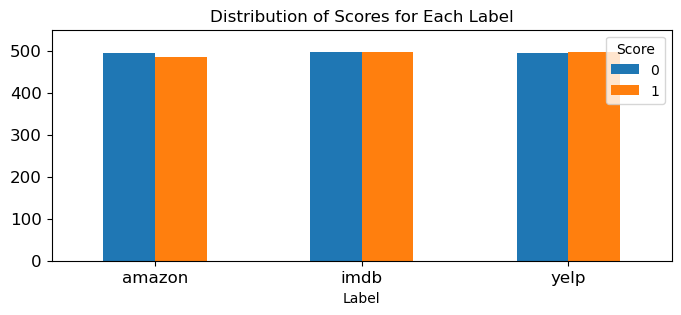

In [209]:
# In total data, the distribution of scores for each label
l_s_group = df.groupby(['Label', 'Score']).size().unstack()

# Plot
l_s_group.plot(kind='bar', stacked=False, title = 'Distribution of Scores for Each Label', ylim = [0, 550], rot = 0,fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Distribution of Scores for Each Label'}, xlabel='Label'>

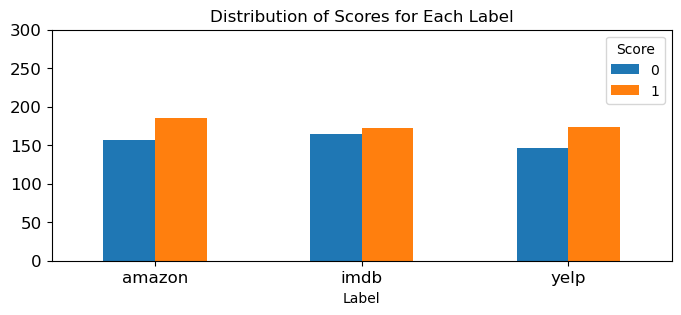

In [210]:
sample_l_s_group = df_sample.groupby(['Label', 'Score']).size().unstack()

# Plot
sample_l_s_group.plot(kind='bar', stacked=False, title = 'Distribution of Scores for Each Label', ylim = [0, 300], rot = 0,fontsize = 12, figsize = (8,3))

Given that the original data had a relatively balanced distribution of 500 positive and 500 negative sentiments for each label, even thought I've already cleaned the data by removing null values and duplicates, the distribution of scores for each label show no significant variations. But yet, the data after sampling show a more significant variations for each label.




---



**Feature Creation**

In [211]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/emma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [212]:
df['unigrams'] = df['Sentence'].apply(lambda x: dmh.tokenize_text(x))
df

,Sentence,Score,Label,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,..."


In [213]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]



---



**Feature subset selection**

In [214]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.Sentence)
print(df_counts.shape)
print(df_counts[0])

(2966, 5153)
  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [215]:
# print out the corresponding word to the last element of the first record (see above)
count_vect.get_feature_names_out()[1012]

'converter'

In [216]:
analyze = count_vect.build_analyzer()
# first way to use analyze to deal with the first record
analyze(df.Sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [217]:
# second way to use analyze to deal with the first record
analyze(" ".join(list(df[:1].Sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [218]:
# the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [219]:
# convert from sparse array to normal array
array = df_counts[0:5, 0:100].toarray()
array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [220]:
# looking into the array above, there is a '1' in the fourth record, so trying to find the corresponding word
corresponding_word = count_vect.get_feature_names_out()[array[3].nonzero()[0][0]]
corresponding_word

'45'

Heat map of term-document matrix.

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_1986,term_1995,term_1998,term_20,term_2000,term_2005,term_2006,term_2007,term_20th,term_2160
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


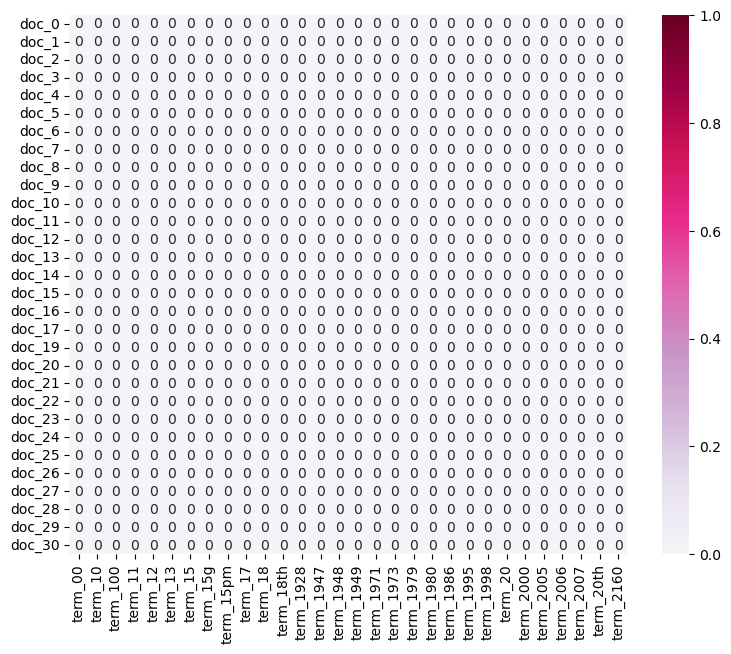

In [221]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:30]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:30]]
plot_z = df_counts[0:30, 0:30].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)

If using a normal way, just choose the first 30 data, the output seem useless.




,term_693,term_3969,term_4863,term_4783,term_2158,term_3876,term_1243,term_4210,term_1975,term_162,...,term_322,term_1316,term_533,term_4621,term_1952,term_4542,term_1876,term_4518,term_2592,term_1582
doc_204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_1374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


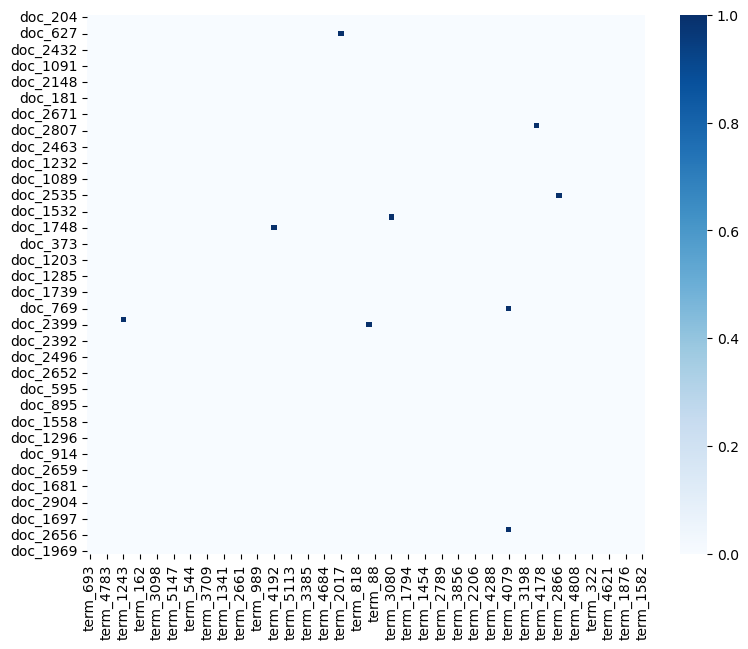

In [222]:
# more data
select_num = 100

# random select
random_term = np.random.choice(len(count_vect.get_feature_names_out()), select_num, replace=False)
random_doc = np.random.choice(len(df.index), select_num, replace=False)

plot_x = ["term_" + str(i) for i in random_term]
plot_y = ["doc_" + str(i) for i in random_doc]
plot_z = df_counts[0:select_num, 0:select_num].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="Blues", vmin=0, annot=False)

After selecting more data and selecting by random, the output seem more helpful, but yet, still not enough.



---



**Dimensionality Reduction**

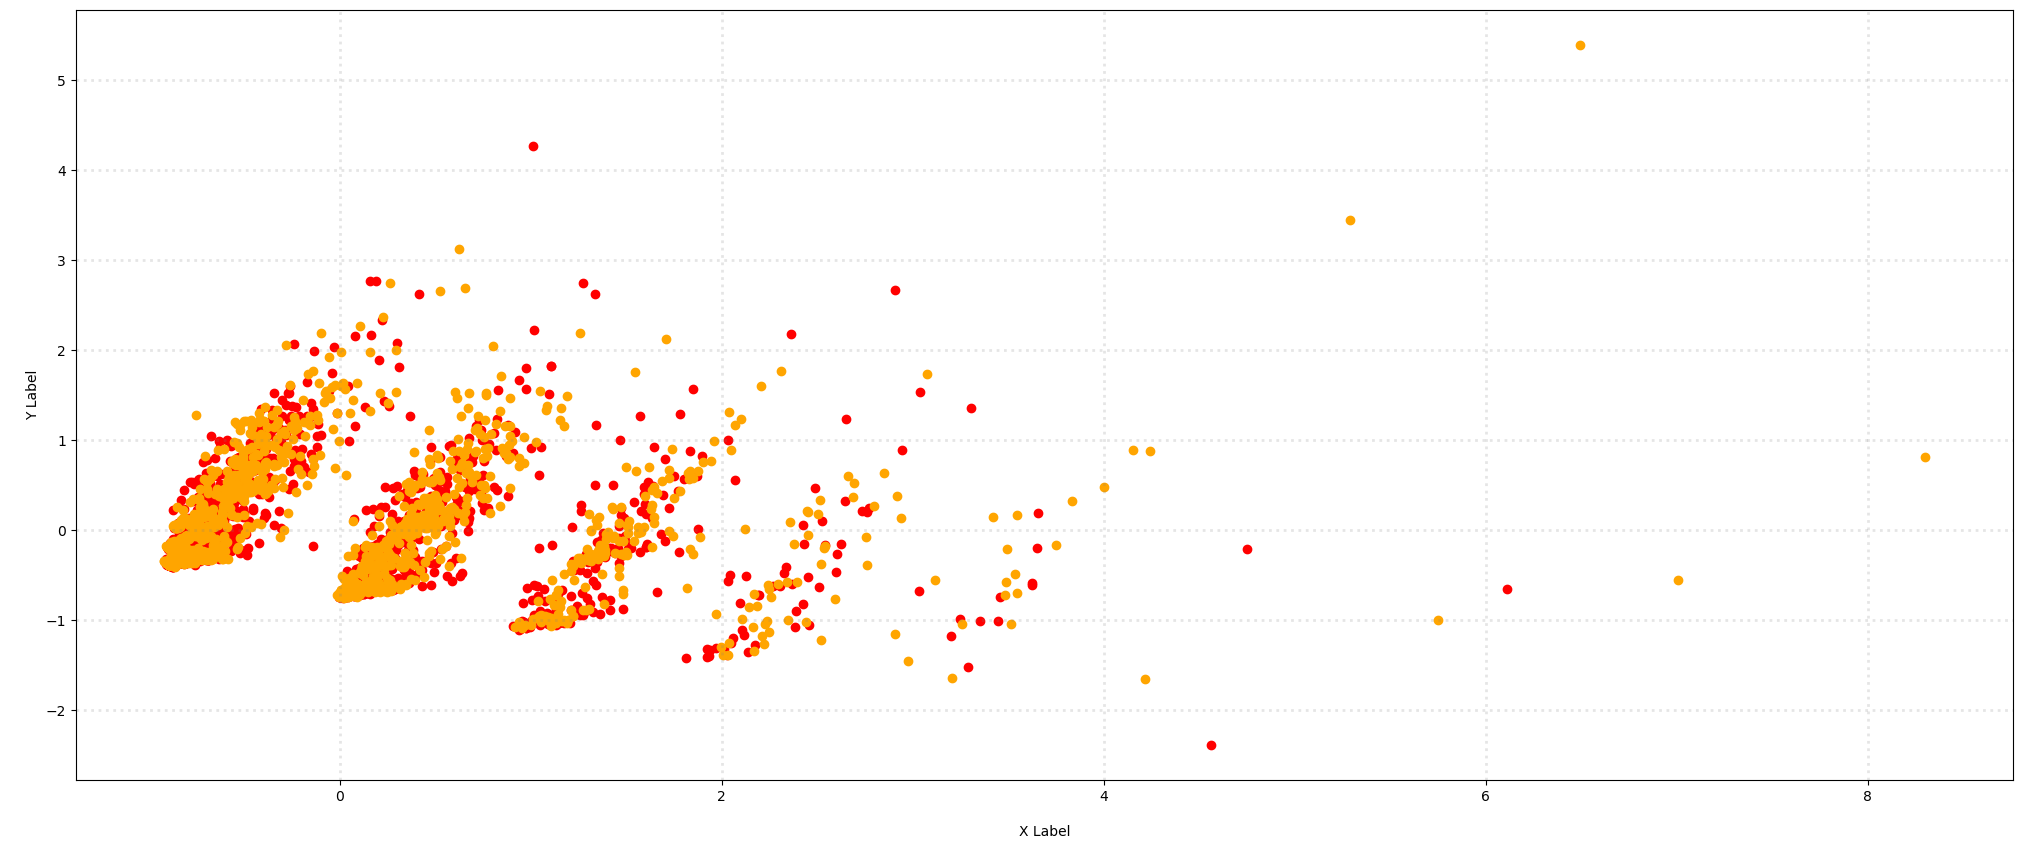

In [223]:
# 2D
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

col = ['red', 'orange']
score = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, score):
    xs = df_reduced[df['Score'] == s].T[0]
    ys = df_reduced[df['Score'] == s].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

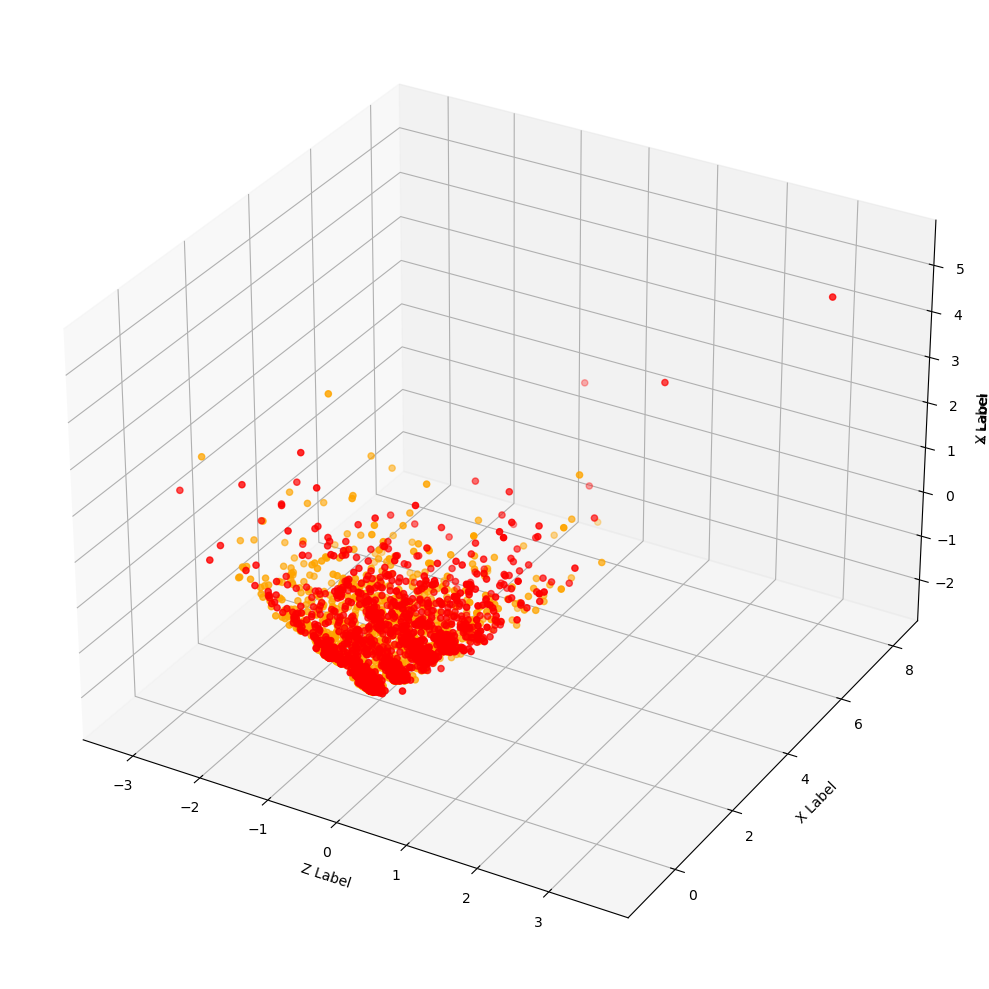

In [224]:
# 3D
col = ['orange', 'red']

df_reduced = PCA(n_components=3).fit_transform(df_counts.toarray())

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(111, projection='3d')  # Angle 1
ax2 = fig.add_subplot(111, projection='3d')  # Angle 2
ax3 = fig.add_subplot(111, projection='3d')  # Angle 3

for c, s in zip(col, score):
    xs = df_reduced[df['Score'] == s].T[0]
    ys = df_reduced[df['Score'] == s].T[1]
    zs = df_reduced[df['Score'] == s].T[2]

    ax1.scatter(xs, ys, zs, c=c, marker='o', label=score)
    ax2.scatter(ys, zs, xs, c=c, marker='o', label=score)
    ax3.scatter(zs, xs, ys, c=c, marker='o', label=score)


ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')
ax2.set_xlabel('Y Label')
ax2.set_ylabel('Z Label')
ax2.set_zlabel('X Label')
ax3.set_xlabel('Z Label')
ax3.set_ylabel('X Label')
ax3.set_zlabel('Y Label')
plt.tight_layout()
plt.show()



---



**Attribute Transformation / Aggregation**

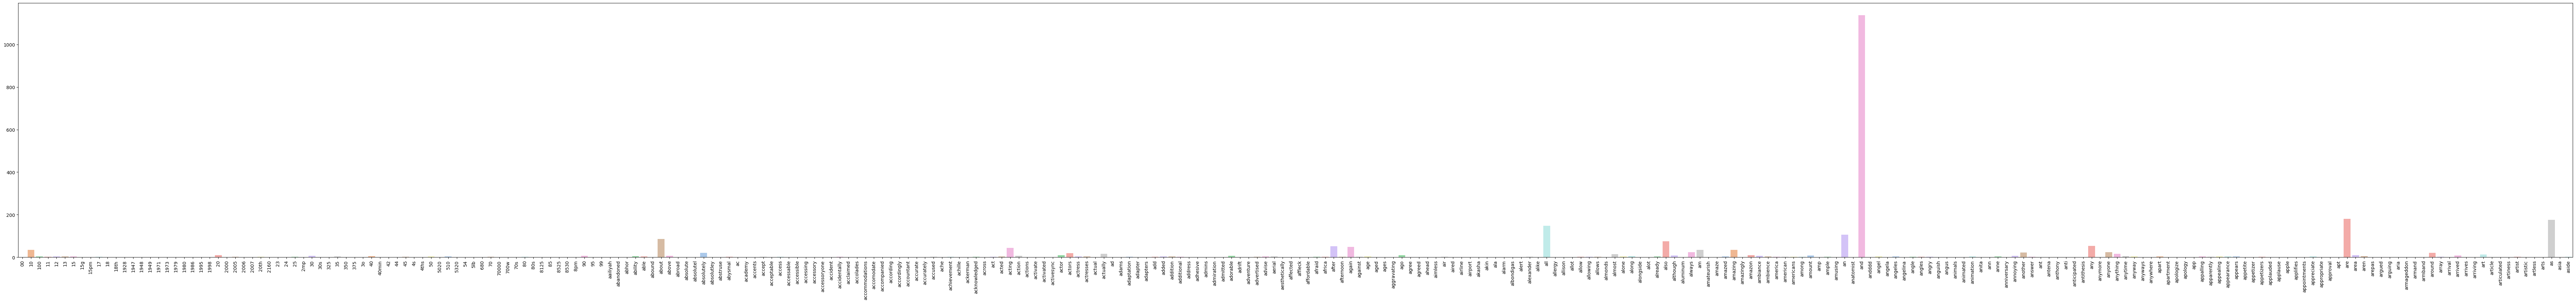

In [225]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300], hue=count_vect.get_feature_names_out()[:300], palette=sns.color_palette("pastel"), legend=False)
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [226]:
fig = plotly.graph_objects.Figure(data=[plotly.graph_objects.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])])
fig.update_layout(xaxis=dict(tickangle=90), xaxis_title='Words', yaxis_title='Frequencies', title='Word Frequencies')
fig.show()

Above visualization show out too many terms, that might be hard to get the information that is useful. So I want to show out less terms and the terms that is more helpful.

In [227]:
frequency_threshold = 50
selected_word = [i for i, freq in enumerate(term_frequencies[:300]) if freq > frequency_threshold]

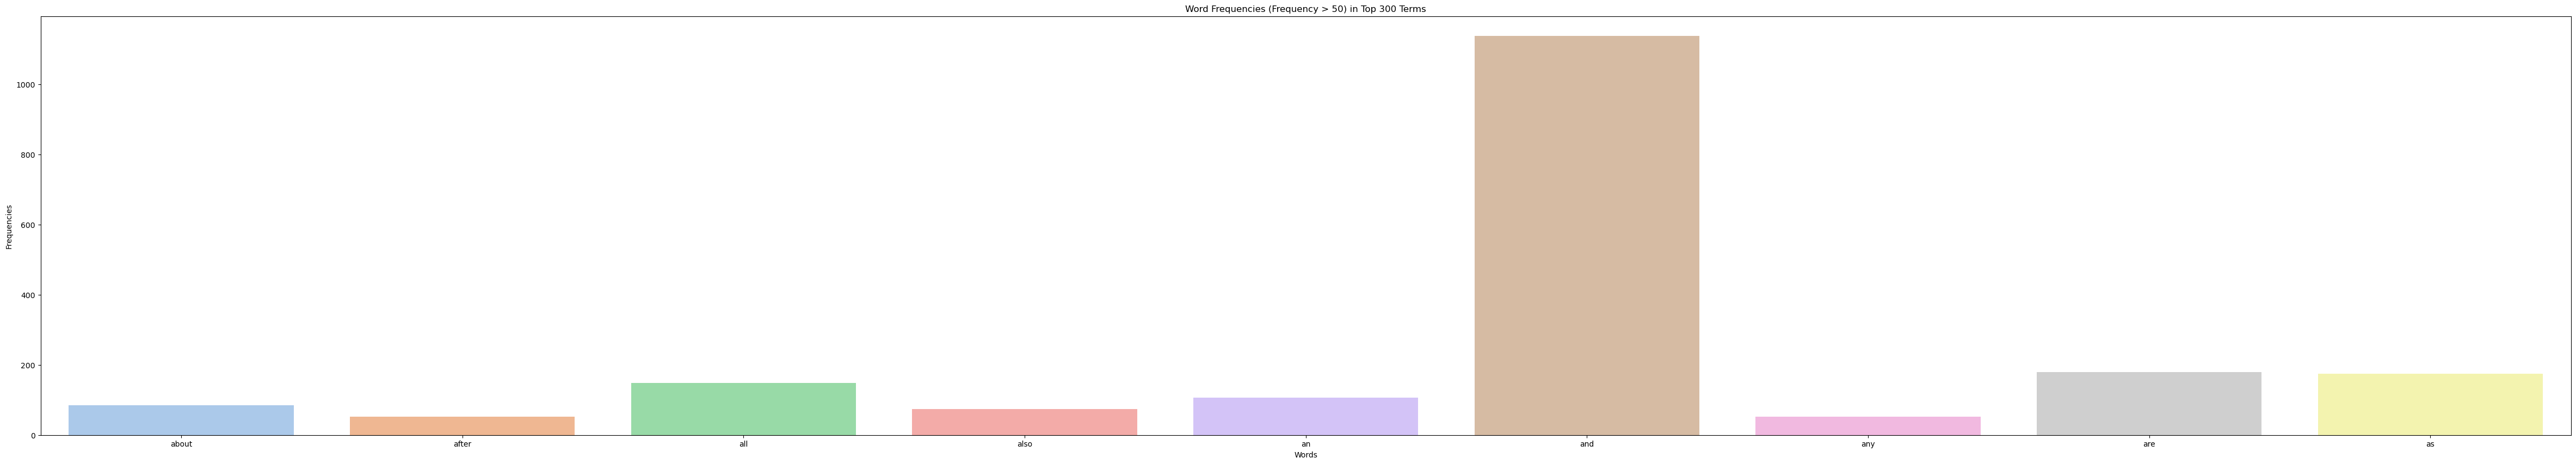

In [228]:
# by sns
plt.subplots(figsize=(60, 10))
sns.barplot(x=count_vect.get_feature_names_out()[:300][selected_word], y=term_frequencies[:300][selected_word], hue=count_vect.get_feature_names_out()[:300][selected_word], palette=sns.color_palette("pastel"), legend=False)
plt.xticks(rotation=0)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Frequencies (Frequency > {}) in Top 300 Terms'.format(frequency_threshold))
plt.show()

In [229]:
# by plotly
fig = plotly.graph_objects.Figure(data=[plotly.graph_objects.Bar(x=count_vect.get_feature_names_out()[:300][selected_word], y=term_frequencies[:300][selected_word])])
fig.update_layout(xaxis=dict(tickangle=0), xaxis_title='Words', yaxis_title='Frequencies', title='Word Frequencies (Frequency > {}) in Top 300 Terms'.format(frequency_threshold))
fig.show()

And now, I want to show by frequence.

In [230]:
sorted_freq = np.argsort(term_frequencies)[::-1]
top_num = 50

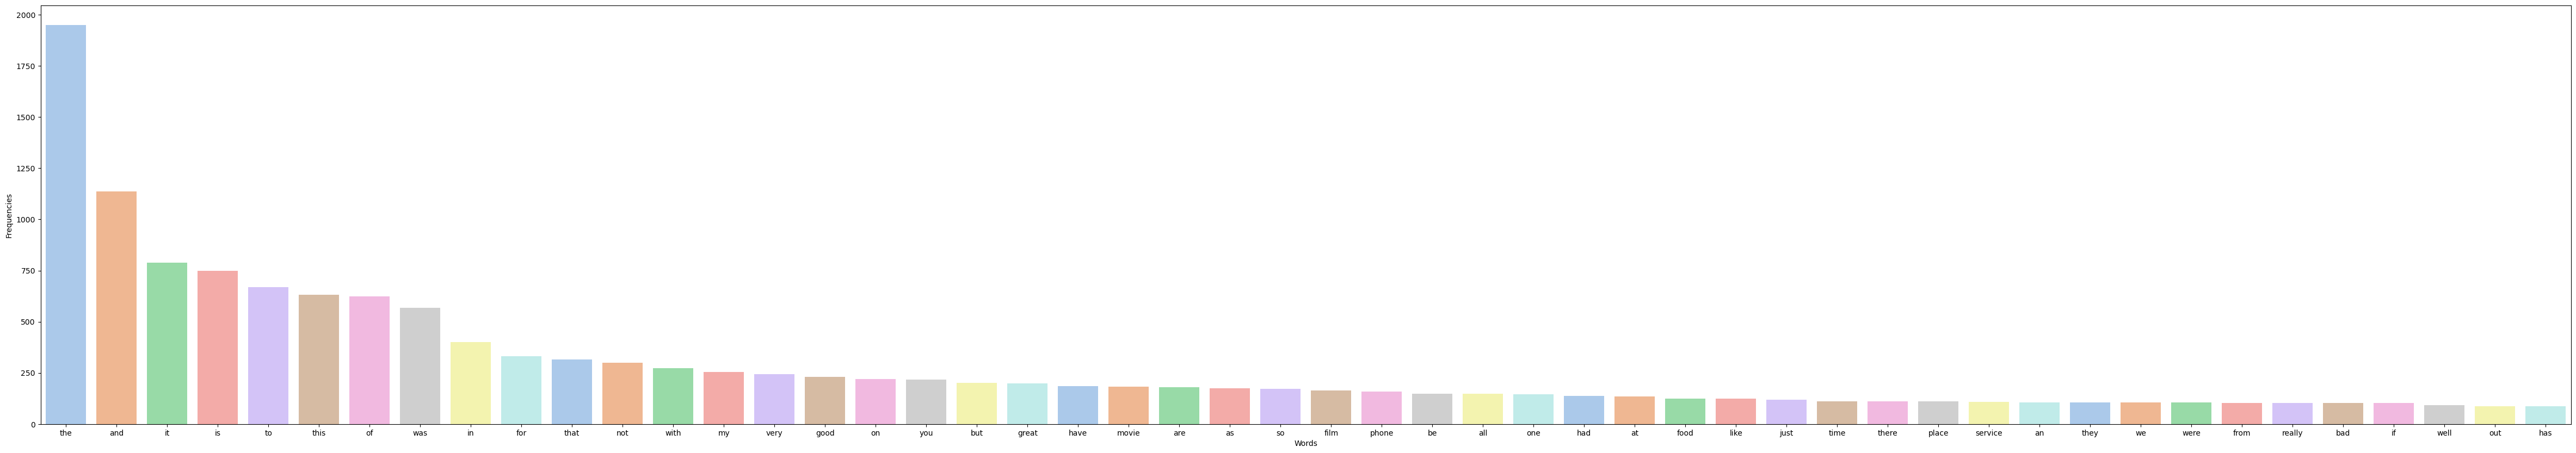

In [231]:
# by sns
plt.subplots(figsize=(60, 10))
sns.barplot(x=count_vect.get_feature_names_out()[sorted_freq[0:top_num]], y=term_frequencies[sorted_freq[0:top_num]], hue=count_vect.get_feature_names_out()[sorted_freq[0:top_num]], palette=sns.color_palette("pastel"), legend=False)
plt.xticks(rotation=0)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.show()

In [232]:
# by plotly
fig = plotly.graph_objects.Figure(data=[plotly.graph_objects.Bar(x=count_vect.get_feature_names_out()[sorted_freq[0:top_num]], y=term_frequencies[sorted_freq[0:top_num]])])
fig.update_layout(xaxis=dict(tickangle=90), xaxis_title='Words', yaxis_title='Frequencies')
fig.show()

Above visualization, I show it by both sns and plotly, since I think that it have a better look by sns, and have a more clearly look by plotly.

Now, try transform the values in that vector into the log distribution, so that we can have a more intuitive way to look into the data.

In [233]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


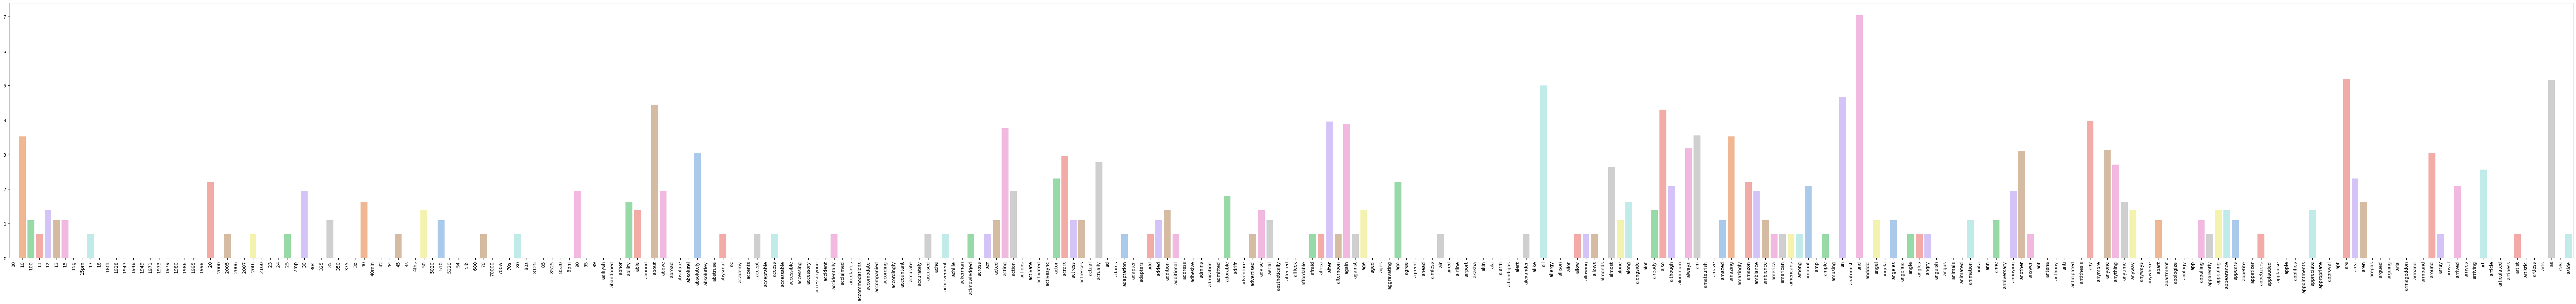

In [234]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies_log[:300], hue=count_vect.get_feature_names_out()[:300], palette=sns.color_palette("pastel"), legend=False)
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)



---



**Discretization and Binarization**

In [235]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [236]:
mlb = preprocessing.LabelBinarizer()

In [237]:
mlb.fit(df.Score)

LabelBinarizer()

In [238]:
df['bin_score'] = mlb.transform(df['Score']).tolist()

In [239]:
mlb.fit(df.Label)

LabelBinarizer()

In [240]:
df['bin_label'] = mlb.transform(df['Label']).tolist()

In [241]:
df

,Sentence,Score,Label,unigrams,bin_score,bin_label
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]",[1],"[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]",[1],"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...",[0],"[1, 0, 0]"
4,The mic is great.,1,amazon,"[The, mic, is, great, .]",[1],"[1, 0, 0]"
...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te...",[0],"[0, 0, 1]"
2996,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]",[0],"[0, 0, 1]"
2997,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ...",[0],"[0, 0, 1]"
2998,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,...",[0],"[0, 0, 1]"


*5. Data Exploration*


In [242]:
# retrieve 3 sentences, each is from different label
document_to_transform_1 = []
random_record_1 = df.iloc[500]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[1500]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[2500]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)

In [243]:
# print out the sentences
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['You never know if you pushed it hard enough or the right number of times for the function you want or not.']
["20th Century Fox's ROAD HOUSE 1948) is not only quite a silly noir but is an implausible unmitigated bore of a movie."]
['Everything was good and tasty!']


In [244]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [255]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [256]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.075378
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


By the above result, I think that maybe sentence 1 and 2 have the same score, while sentence 3 has the opposite score. Let's check if so?

In [257]:
print('Score of sentence 1: ', df.iloc[500]['Score'])
print('Score of sentence 2: ', df.iloc[1500]['Score'])
print('Score of sentence 3: ', df.iloc[2500]['Score'])

Score of sentence 1:  0
Score of sentence 2:  0
Score of sentence 3:  1


## THIRD

**Generate meaningful new data visualizations.**

When compared to the entire dataset, I believe that separating the data into two distinct groups – one for positive and the other for negative – and visualizing them apart can yield more meaningful insights.

In [258]:
score_0_df = df[df['Score'] == 0]
score_1_df = df[df['Score'] == 1]

df0_counts = count_vect.fit_transform(score_0_df.Sentence)
df1_counts = count_vect.fit_transform(score_1_df.Sentence)

FOR SCORE = 0 (NEGATIVE)

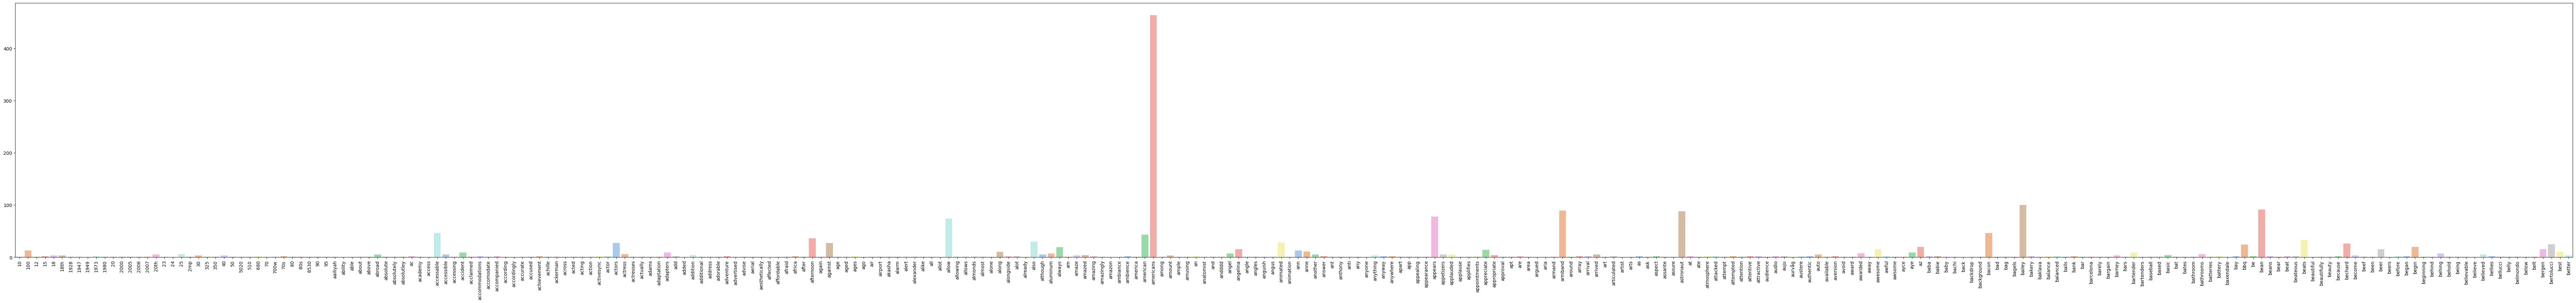

In [260]:
term_frequencies_0 = []
for j in range(0,df0_counts.shape[1]):
    term_frequencies_0.append(sum(df0_counts[:,j].toarray()))
term_frequencies_0 = np.asarray(df0_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies_0[:300], hue=count_vect.get_feature_names_out()[:300], palette=sns.color_palette("pastel"), legend=False)
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

FOR SCORE = 1 (POSITIVE)

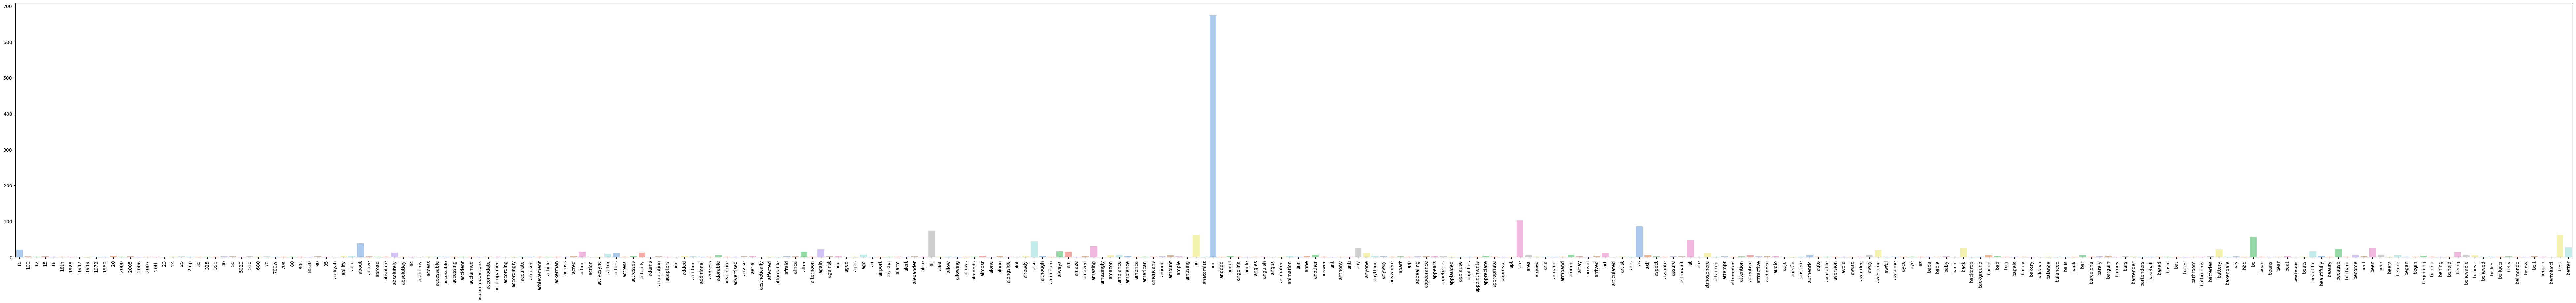

In [261]:
term_frequencies_1 = []
for j in range(0,df1_counts.shape[1]):
    term_frequencies_1.append(sum(df1_counts[:,j].toarray()))
term_frequencies_1 = np.asarray(df1_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies_1[:300], hue=count_vect.get_feature_names_out()[:300], palette=sns.color_palette("pastel"), legend=False)
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);



---



**Generate TF-IDF features from the tokens of each text.**

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf_fit = tfidf.fit_transform(df['Sentence'])

tfidf_df = pd.DataFrame(tfidf_fit.toarray(), columns=tfidf.get_feature_names_out())

print(tfidf_df)

       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2961  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2962  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2963  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2964  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2965  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  




---



**Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.**

In [263]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Input
X = df['Sentence']
# Output
y = df['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the TF-IDF vectorizer and Count Vectorizer
tfidf = TfidfVectorizer()
count = CountVectorizer()

# Transform the data using the vectorizers
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

# Create Naive Bayes classifiers
nb_tfidf = MultinomialNB()
nb_count = MultinomialNB()

# Training
nb_tfidf.fit(X_train_tfidf, y_train)
nb_count.fit(X_train_count, y_train)

# Predicting
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
y_pred_count = nb_count.predict(X_test_count)

# Evaluating
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
accuracy_count = accuracy_score(y_test, y_pred_count)

print("Accuracy using TF-IDF features:", accuracy_tfidf)
print("Accuracy using word frequency features:", accuracy_count)

# classification reports for more details
report_tfidf = classification_report(y_test, y_pred_tfidf)
report_count = classification_report(y_test, y_pred_count)

print("Classification Report (TF-IDF features):\n", report_tfidf)
print("Classification Report (word frequency features):\n", report_count)


Accuracy using TF-IDF features: 0.8078651685393259
Accuracy using word frequency features: 0.802247191011236
Classification Report (TF-IDF features):
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       421
           1       0.87      0.75      0.80       469

    accuracy                           0.81       890
   macro avg       0.81      0.81      0.81       890
weighted avg       0.82      0.81      0.81       890

Classification Report (word frequency features):
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       421
           1       0.85      0.76      0.80       469

    accuracy                           0.80       890
   macro avg       0.80      0.80      0.80       890
weighted avg       0.81      0.80      0.80       890



## FOURTH

1.   In the lab, during the visualization process, we utilize the entire dataset. However, I believe it would be more meaningful if we segregate the complete dataset into different categories before conducting the visualization. This approach would allow us to gain a clearer insight into how the distribution varies across distinct categories.
2.   There is another aspect that I found perplexing, which related to my understanding of plotting sns.heatmap. I believe sns.barplot effectively highlights similar points of the data, making them clearer and easier to discern. However, this might be due to my lack of knowledge on how to present the data more efficiently.